In [2]:
import glob
import pandas as pd

import h2o
from h2o.automl import H2OAutoML

import pandas as pd
import numpy as np

import matplotlib as plt
%matplotlib inline

#Import the Estimators
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators import H2OXGBoostEstimator

#Import h2o grid search 
import h2o.grid 
from h2o.grid.grid_search import H2OGridSearch

xgboostModel = h2o.estimators.xgboost.H2OXGBoostEstimator()
#H2OXGBoostEstimator.available()

# xgboostModel = h2o.estimators.xgboost.H2OXGBoostEstimator()
# H2OXGBoostEstimator.available()

from datetime import datetime

import glob

In [3]:
submission_set = pd.read_csv("/mnt/SMB_share/mark/flight_competition/final_submission_set.csv")

In [4]:
files = glob.glob("data/by_type_consolidated/*.csv")
segments = [x.split("/")[-1].replace(".csv", "") for x in files]
segments

['B39M',
 'A21N',
 'A343',
 'A320',
 'B752',
 'BCS3',
 'A319',
 'E190',
 'E195',
 'A321',
 'B738',
 'AT76',
 'A20N',
 'B739',
 'E290',
 'A332',
 'CRJ9',
 'B763',
 'A333',
 'B788',
 'A310',
 'A359',
 'C56X',
 'B789',
 'B38M',
 'BCS1',
 'B737',
 'B772',
 'B773',
 'B77W']

In [27]:
# for segment in segments: 
#     this_data = pd.read_csv("data/by_type_consolidated/"+segment+".csv")
#     this_data = this_data[this_data["tow"].isna()]
#     this_data.to_csv("data/by_type_consolidated_submission/"+segment+".csv", index=False)

In [32]:
stage_2_models = glob.glob("data/models/*/")
stage_2_models

['data/models/stage_three_10_22_24_09_29_added/',
 'data/models/stage_one_10_24_24_17_16_added/',
 'data/models/state_2_B739_10_20_24_2697.0/',
 'data/models/state_2_BCS3_10_18_24_2109.0/',
 'data/models/state_2_B38M_10_21_24_2997.0/',
 'data/models/state_2_B752_10_18_24_353.0/',
 'data/models/state_2_A343_10_18_24_8560.0/',
 'data/models/state_2_AT76_10_20_24_824.0/',
 'data/models/state_2_B77W_10_21_24_27835.0/',
 'data/models/state_2_B763_10_20_24_6942.0/',
 'data/models/state_2_A319_10_18_24_1887.0/',
 'data/models/state_2_E190_10_18_24_1401.0/',
 'data/models/state_2_A321_10_19_24_2986.0/',
 'data/models/state_2_B737_10_21_24_2681.0/',
 'data/models/stage_one_10_17_24_22_18_added/',
 'data/models/state_2_A359_10_21_24_10614.0/',
 'data/models/state_2_B39M_10_18_24_2518.0/',
 'data/models/state_2_E195_10_19_24_1904.0/',
 'data/models/state_2_B772_10_21_24_14757.0/',
 'data/models/state_2_A20N_10_20_24_2829.0/',
 'data/models/state_2_B789_10_21_24_19189.0/',
 'data/models/state_2_B7

In [5]:
h2o.init(max_mem_size = "25g", nthreads = 12)


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,14 hours 54 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,3 months and 14 days
H2O_cluster_name:,H2O_from_python_mark_keph72
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,38.07 Gb
H2O_cluster_total_cores:,128
H2O_cluster_allowed_cores:,11
H2O_cluster_status:,"locked, healthy"


In [33]:
done = ["B39M", "A21N", "A343", "B752", "BCS3", "A319", "E190", "E195", "A321", "A320", "B738", "AT76",]
#["B39M", "A21N", "A343", "B752", "BCS3", "A319", "E190", "E195", "A321", "A320", "B738", "AT76", "A20N", "B739", "A332", "CRJ9", "B763", "A333", "B788", "A310", "A359", "B789", "B38M", "BCS1", "B737", "B772", "B77W"]
#A320, do this later

segments = [seg for seg in segments if seg not in done]

In [34]:


for segment in segments: 
    print(segment)
    try:
        this_data = h2o.import_file("data/by_type_consolidated/"+segment+".csv")
        
        # x = this_data.columns
        # y = "tow"
        # ignore = ["segment", "fold_group", "aircraft_type", "Unnamed: 0"] 
        # x = list(set(x) - set(ignore))
        # x.remove(y)

        
        these_models = [x for x in stage_2_models if segment in x]
    
        if len(these_models) > 0: 
            best_model = these_models[0]
    
        else: 
            print("no models")
    
        
        this_model = glob.glob(best_model+"/*")[0]
        stage_two_model = h2o.load_model(this_model)
        
        print(this_model)
        
        predictions = stage_two_model.predict(this_data)
        print("data loaded")
        this_data = this_data[["flight_id", "sec_since_takeoff"]]
        this_data["stage_two_segmented"] = predictions
        this_data.as_data_frame().to_csv("data/stage_2_predictions/"+segment+".csv", index=False)
        
    except Exception as e: 
        print(e)

A20N
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_A20N_10_20_24_2829.0/StackedEnsemble_AllModels_1_AutoML_1_20241020_45234
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


B739
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_B739_10_20_24_2697.0/StackedEnsemble_AllModels_1_AutoML_2_20241020_101040
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


E290
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
no models
data/models/state_2_B739_10_20_24_2697.0/StackedEnsemble_AllModels_1_AutoML_2_20241020_101040
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded
A332


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_A332_10_20_24_5253.0/StackedEnsemble_AllModels_1_AutoML_4_20241020_111006
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


CRJ9
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_CRJ9_10_20_24_1224.0/StackedEnsemble_BestOfFamily_1_AutoML_5_20241020_121600
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


B763
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_B763_10_20_24_6942.0/StackedEnsemble_AllModels_1_AutoML_6_20241020_154158
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


A333
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_A333_10_21_24_11534.0/StackedEnsemble_AllModels_1_AutoML_2_20241020_234006
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


B788
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_B788_10_21_24_8395.0/StackedEnsemble_AllModels_1_AutoML_3_20241021_30823
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


A310
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_A310_10_21_24_1913.0/XGBoost_lr_search_selection_AutoML_4_20241021_43157_select_grid_model_4
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


A359
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_A359_10_21_24_10614.0/StackedEnsemble_BestOfFamily_1_AutoML_5_20241021_43606
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


C56X
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
no models
data/models/state_2_A359_10_21_24_10614.0/StackedEnsemble_BestOfFamily_1_AutoML_5_20241021_43606
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded
B789


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_B789_10_21_24_19189.0/StackedEnsemble_AllModels_1_AutoML_7_20241021_54708
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


B38M
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_B38M_10_21_24_2997.0/StackedEnsemble_BestOfFamily_1_AutoML_3_20241021_140719
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


BCS1
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_BCS1_10_21_24_1713.0/StackedEnsemble_AllModels_1_AutoML_4_20241021_162111
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


B737
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_B737_10_21_24_2681.0/StackedEnsemble_AllModels_1_AutoML_5_20241021_173754
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


B772
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_B772_10_21_24_14757.0/StackedEnsemble_AllModels_1_AutoML_6_20241021_184611
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


B773
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
no models
data/models/state_2_B772_10_21_24_14757.0/StackedEnsemble_AllModels_1_AutoML_6_20241021_184611
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded
B77W


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
data/models/state_2_B77W_10_21_24_27835.0/StackedEnsemble_AllModels_1_AutoML_8_20241021_202509
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [35]:
files = glob.glob("data/stage_2_predictions/*.csv")
all_data = pd.DataFrame([])
for file in files: 
    this_data = pd.read_csv(file)
    all_data = pd.concat([all_data, this_data])

all_data
    

,flight_id,sec_since_takeoff,stage_two_segmented
0,251773655,0.00,77276.580111
1,251773655,30.75,77278.977994
2,251773655,61.50,77189.866359
3,251773655,92.25,77111.477274
4,251773655,123.00,77117.278585
...,...,...,...
450296,252677673,870.00,223494.159724
450297,252677673,900.00,226256.970828
450298,252677673,930.00,227575.692926
450299,252677673,960.00,229733.194720


<Axes: >

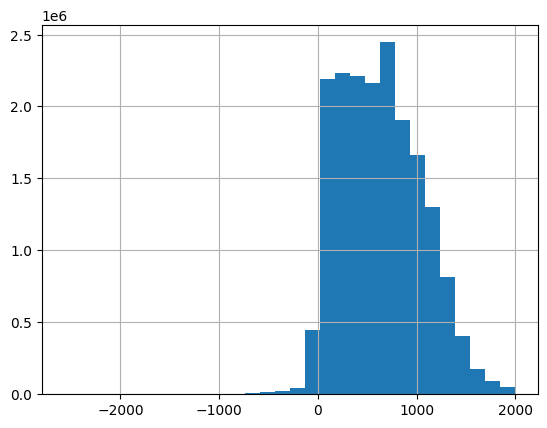

In [39]:
all_data[all_data["sec_since_takeoff"]<2000]["sec_since_takeoff"].hist(bins=30)

In [41]:
bins = [0,100,200,300,400,500,600,700,800,900,1000]
#bins = [0,300,600,900,1200]
binned = all_data.dropna(subset=["stage_two_segmented"]).pivot_table(index='flight_id', columns=pd.cut(all_data['sec_since_takeoff'],  bins), values="stage_two_segmented", aggfunc='median')
binned

sec_since_takeoff,"(0, 100]","(100, 200]","(200, 300]","(300, 400]","(400, 500]","(500, 600]","(600, 700]","(700, 800]","(800, 900]","(900, 1000]"
flight_id,,,,,,,,,,
248750643,185927.730062,190401.583817,183636.834225,181884.809214,182226.934747,181900.769159,180674.800715,180325.008413,180948.819774,178192.779950
248750693,62524.581589,65388.889230,63399.642751,61991.893430,57927.230351,59741.685828,NaN,NaN,NaN,NaN
248750694,74809.471925,75905.507743,77363.988451,77001.706955,73887.793758,73224.800660,73154.388927,72817.121976,72253.394724,72696.152703
248750710,65950.452186,67924.051791,68372.243882,68428.607978,67754.206281,68170.590174,67491.392832,67460.021677,67932.289056,68735.112892
248750771,67284.592301,66490.932450,66204.470397,68041.272686,68673.443627,68768.819609,69633.214976,70047.220221,70197.041158,70256.492914
...,...,...,...,...,...,...,...,...,...,...
258074338,202774.251330,209509.942795,212274.439361,216013.515392,224265.582582,225767.641858,227991.285067,229841.328835,228186.527245,229454.470932
258074448,50699.016014,52457.056569,52977.132746,52757.662223,52940.228897,53269.098170,53156.033484,52455.822579,51412.292540,50977.596395
258074471,79798.624186,80462.902947,79333.018650,79505.585110,80409.642552,80218.173143,80192.965615,79954.638992,80623.699500,78102.080768


In [42]:
binned.columns = ["stage_two_"+str(x) for x in bins[1:]]
binned = binned.reset_index()
binned

,flight_id,stage_two_100,stage_two_200,stage_two_300,stage_two_400,stage_two_500,stage_two_600,stage_two_700,stage_two_800,stage_two_900,stage_two_1000
0,248750643,185927.730062,190401.583817,183636.834225,181884.809214,182226.934747,181900.769159,180674.800715,180325.008413,180948.819774,178192.779950
1,248750693,62524.581589,65388.889230,63399.642751,61991.893430,57927.230351,59741.685828,NaN,NaN,NaN,NaN
2,248750694,74809.471925,75905.507743,77363.988451,77001.706955,73887.793758,73224.800660,73154.388927,72817.121976,72253.394724,72696.152703
3,248750710,65950.452186,67924.051791,68372.243882,68428.607978,67754.206281,68170.590174,67491.392832,67460.021677,67932.289056,68735.112892
4,248750771,67284.592301,66490.932450,66204.470397,68041.272686,68673.443627,68768.819609,69633.214976,70047.220221,70197.041158,70256.492914
...,...,...,...,...,...,...,...,...,...,...,...
451994,258074338,202774.251330,209509.942795,212274.439361,216013.515392,224265.582582,225767.641858,227991.285067,229841.328835,228186.527245,229454.470932
451995,258074448,50699.016014,52457.056569,52977.132746,52757.662223,52940.228897,53269.098170,53156.033484,52455.822579,51412.292540,50977.596395
451996,258074471,79798.624186,80462.902947,79333.018650,79505.585110,80409.642552,80218.173143,80192.965615,79954.638992,80623.699500,78102.080768
451997,258074485,48729.537931,50432.476923,49883.756714,50283.992374,49420.291541,NaN,NaN,NaN,NaN,NaN


In [43]:
binned.to_csv("data/binned_stage_two.csv", index=False)

## Get stage one predictions

In [6]:
binned = pd.read_csv("data/binned_stage_two.csv")

In [64]:
data = h2o.import_file("data/STAGE_1_ALL_rep.csv")
data

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


flight_id,month,day_of_week,hour_in_local,adep,ades,aircraft_type,replacer,airline,mtow_fill,oew_fill,total_fuel_fill,tow,dataset,first_cruise_alt,time_to_cruise,alt_per_s,est_load_lf_adjusted,est_tow,flight_duration_sec,great_circle_km
2.48764e+08,1,5,13,EGLL,EICK,A320,A320,a73f82288988b79be490c6322f4c32ed,78000,42600,2057,54748,challenge,nan,nan,nan,22740,67397,3660,555
2.48761e+08,1,5,10,LEBL,KMIA,B772,A333,5543e4dc327359ffaf5b9c0e6faaf0e1,297000,138000,70057,185441,challenge,33000,1320,25,60659,268716,34200,7544
2.48754e+08,1,5,10,ESSA,KORD,A333,A333,8be5c854fd664bcb97fb543339f74770,242000,122780,63802,230396,challenge,36000,1890,19,37795,224377,33240,6855
2.48754e+08,1,5,12,LSZH,KPHL,B788,A332,5543e4dc327359ffaf5b9c0e6faaf0e1,228000,119000,58743,157615,challenge,38000,1410,27,34275,212018,29820,6459
2.48756e+08,1,5,12,EIDW,EGLL,A21N,A321,a73f82288988b79be490c6322f4c32ed,97000,50000,2306,70318,challenge,33000,990,33.3,30481,82787,3300,449
2.48763e+08,1,5,11,ENGM,LEAL,A20N,B738,8be5c854fd664bcb97fb543339f74770,79000,44300,8618,57721,challenge,38000,1028,37,17788,70706,12840,2570
2.48759e+08,1,5,7,EGAC,EGLL,A320,A320,a73f82288988b79be490c6322f4c32ed,78000,42600,1902,56818,challenge,33000,990,33.3,22846,67348,3420,503
2.48753e+08,1,5,8,LTFM,LYBE,B738,B738,6351ec1b849adacc0cbb3b1313d8d39b,79000,41400,3040,60678,challenge,36000,1110,32.4,23570,68010,4740,789
2.48762e+08,1,5,16,KLAX,LTFM,B789,A333,6351ec1b849adacc0cbb3b1313d8d39b,254000,128000,101455,235632,challenge,35000,1590,22,16740,246195,44340,11001
2.48753e+08,1,5,18,LTFM,LTAC,A321,A321,6351ec1b849adacc0cbb3b1313d8d39b,93500,48500,1892,73571,challenge,nan,nan,nan,29400,79792,2640,381


In [65]:
data["airline"] = data["airline"].asfactor()
data["aircraft_type"] = data["aircraft_type"].asfactor()
data["replacer"] = data["replacer"].asfactor()
data["adep"] = data["adep"].asfactor()
data["ades"] = data["ades"].asfactor()
data["month"] = data["month"].asfactor()
data["day_of_week"] = data["day_of_week"].asfactor()
data["hour_in_local"] = data["hour_in_local"].asfactor()

In [66]:
this_model = glob.glob("data/models/stage_one_10_24_24_17_16_added/*")[0]
stage_one_model = h2o.load_model(this_model)

predictions = stage_one_model.predict(data)
print("data loaded")
data = data[["flight_id", "first_cruise_alt", "time_to_cruise", "alt_per_s"]]
data["stage_one"] = predictions
data.as_data_frame().to_csv("data/STAGE_1_PREDICTIONS.csv", index=False)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
data loaded


/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'airline' has levels not trained on: ["e5b13da1511ff741c34c94cfd5575c55"]
  warnings.warn(w)
/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


## Combine data for stage 3 training

In [67]:
data = data.as_data_frame()
data["stage_one"] = data["stage_one"].astype(float)
data["first_cruise_alt"] = data["first_cruise_alt"].astype(float)
data["time_to_cruise"] = data["time_to_cruise"].astype(float)
data["alt_per_s"] = data["alt_per_s"].astype(float)
data

/home/mark/for_pycaret/lib/python3.11/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,flight_id,first_cruise_alt,time_to_cruise,alt_per_s,stage_one
0,248763780,NaN,NaN,NaN,56045.698293
1,248760618,33000.0,1320.0,25.0,185661.096075
2,248753824,36000.0,1890.0,19.0,213825.431910
3,248753852,38000.0,1410.0,27.0,153287.291027
4,248755934,33000.0,990.0,33.3,70070.461836
...,...,...,...,...,...
527157,258068876,36000.0,1470.0,24.5,73411.702638
527158,258064675,27000.0,969.0,27.9,61489.849637
527159,258065436,33000.0,1350.0,24.4,193731.229365
527160,258058138,32000.0,1230.0,26.0,41630.927233


In [68]:
challenge_set = pd.read_csv("/mnt/SMB_share/mark/flight_competition/challenge_set.csv")
challenge_set["dataset"] = "challenge"
submission_set = pd.read_csv("/mnt/SMB_share/mark/flight_competition/final_submission_set.csv")
submission_set["dataset"] = "submission"
datasets = pd.concat([challenge_set, submission_set])
datasets.head()

,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,arrival_time,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,tow,dataset
0,248763780,2022-01-01,3840d84f25d3f5fcc0a1be3076bb4039,EGLL,London Heathrow,GB,EICK,Cork,IE,2022-01-01T13:46:00Z,2022-01-01T15:04:56Z,A320,M,a73f82288988b79be490c6322f4c32ed,61,18,321,54748.000000,challenge
1,248760618,2022-01-01,f6f610e73002b8892a239a81321f7f1d,LEBL,Barcelona,ES,KMIA,Miami,US,2022-01-01T09:55:00Z,2022-01-01T19:37:56Z,B772,H,5543e4dc327359ffaf5b9c0e6faaf0e1,570,13,4193,185441.000000,challenge
2,248753824,2022-01-01,139670936660762c230ca92556ba842b,ESSA,Stockholm Arlanda,SE,KORD,Chicago O'Hare,US,2022-01-01T09:39:00Z,2022-01-01T19:08:13Z,A333,H,8be5c854fd664bcb97fb543339f74770,554,15,3770,230396.000000,challenge
3,248753852,2022-01-01,509dc61bb54fbab0e5406067c95603e2,LSZH,Zurich,CH,KPHL,Philadelphia,US,2022-01-01T11:04:00Z,2022-01-01T19:32:13Z,B788,H,5543e4dc327359ffaf5b9c0e6faaf0e1,497,11,3607,157615.000000,challenge
4,248755934,2022-01-01,d0610d000dcf26b1d7bba8103ecc393d,EIDW,Dublin,IE,EGLL,London Heathrow,GB,2022-01-01T12:36:00Z,2022-01-01T13:44:32Z,A21N,M,a73f82288988b79be490c6322f4c32ed,55,14,305,70318.447226,challenge


In [69]:
combined_data = datasets[["flight_id", "tow", "dataset"]].merge(data, on="flight_id", how="left").merge(binned, on="flight_id", how="left")
combined_data


,flight_id,tow,dataset,first_cruise_alt,time_to_cruise,alt_per_s,stage_one,stage_two_100,stage_two_200,stage_two_300,stage_two_400,stage_two_500,stage_two_600,stage_two_700,stage_two_800,stage_two_900,stage_two_1000
0,248763780,54748.000000,challenge,NaN,NaN,NaN,56045.698293,57089.794417,57496.143561,57134.488709,58810.903091,57568.567660,57975.833290,58175.669233,60962.742514,58758.526502,58578.686759
1,248760618,185441.000000,challenge,33000.0,1320.0,25.0,185661.096075,182358.801678,183773.692083,185621.618810,184743.248081,184120.743636,182744.876187,182242.545664,185012.102413,184535.745062,184333.215474
2,248753824,230396.000000,challenge,36000.0,1890.0,19.0,213825.431910,207498.254060,208108.614946,215371.202591,216142.395929,219802.578074,222473.120668,228239.221201,230589.981935,230526.807110,231359.433580
3,248753852,157615.000000,challenge,38000.0,1410.0,27.0,153287.291027,150859.265600,153859.866646,158660.897663,155118.899922,158458.152896,153880.773893,153938.723967,154837.868805,155054.294264,158414.072882
4,248755934,70318.447226,challenge,33000.0,990.0,33.3,70070.461836,71280.166600,70566.167493,68575.792274,67575.489500,67226.687889,67176.084694,68460.695303,68638.402243,68930.649976,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527157,258068876,NaN,submission,36000.0,1470.0,24.5,73411.702638,75260.737034,76302.987705,74126.791589,73017.778145,73868.593154,73935.003408,73454.072769,73599.255302,73098.978763,73062.566064
527158,258064675,NaN,submission,27000.0,969.0,27.9,61489.849637,60749.452064,60270.983883,60431.245691,61457.864898,61492.154359,61227.282105,61171.030715,61241.825676,62134.619897,NaN
527159,258065436,NaN,submission,33000.0,1350.0,24.4,193731.229365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527160,258058138,NaN,submission,32000.0,1230.0,26.0,41630.927233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
combined_data[combined_data["dataset"]=="submission"]["stage_one"].unique()

array([ 69933.06345122, 214815.64678712, 222548.85927213, ...,
       193731.22936534,  41630.9272331 ,  64493.17917538])

In [71]:
array = [[x.split("/")[-2].split("_")[2], x.split("/")[-2].split("_")[-1]]  for x in stage_2_models]
accuracies = pd.DataFrame(array, columns=["aircraft_type", "accuracy"])
accuracies = accuracies[accuracies["accuracy"]!="added"]
median_tows = datasets[datasets["tow"].notna()].groupby("aircraft_type")["tow"].median().reset_index()
accuracies = accuracies.merge(median_tows, on="aircraft_type", how="left")
accuracies["percent_error"] = accuracies["accuracy"].astype(float) / accuracies["tow"].astype(float) * 100
accuracies

,aircraft_type,accuracy,tow,percent_error
0,B739,2697.0,67850.000000,3.974945
1,BCS3,2109.0,53889.000000,3.913600
2,B38M,2997.0,68795.000000,4.356421
3,B752,353.0,92863.000000,0.380130
4,A343,8560.0,231235.000000,3.701862
5,AT76,824.0,19944.000000,4.131568
6,B77W,27835.0,244012.000000,11.407226
7,B763,6942.0,158438.000000,4.381525
8,A319,1887.0,57917.237037,3.258097
9,E190,1401.0,44922.000000,3.118739


In [72]:
combined_data = combined_data.merge(datasets[["flight_id", "aircraft_type"]], on="flight_id", how="left").merge(accuracies[["aircraft_type", "percent_error"]], how="left", on="aircraft_type")
combined_data


,flight_id,tow,dataset,first_cruise_alt,time_to_cruise,alt_per_s,stage_one,stage_two_100,stage_two_200,stage_two_300,stage_two_400,stage_two_500,stage_two_600,stage_two_700,stage_two_800,stage_two_900,stage_two_1000,aircraft_type,percent_error
0,248763780,54748.000000,challenge,NaN,NaN,NaN,56045.698293,57089.794417,57496.143561,57134.488709,58810.903091,57568.567660,57975.833290,58175.669233,60962.742514,58758.526502,58578.686759,A320,6.072179
1,248760618,185441.000000,challenge,33000.0,1320.0,25.0,185661.096075,182358.801678,183773.692083,185621.618810,184743.248081,184120.743636,182744.876187,182242.545664,185012.102413,184535.745062,184333.215474,B772,7.841501
2,248753824,230396.000000,challenge,36000.0,1890.0,19.0,213825.431910,207498.254060,208108.614946,215371.202591,216142.395929,219802.578074,222473.120668,228239.221201,230589.981935,230526.807110,231359.433580,A333,5.947108
3,248753852,157615.000000,challenge,38000.0,1410.0,27.0,153287.291027,150859.265600,153859.866646,158660.897663,155118.899922,158458.152896,153880.773893,153938.723967,154837.868805,155054.294264,158414.072882,B788,5.403301
4,248755934,70318.447226,challenge,33000.0,990.0,33.3,70070.461836,71280.166600,70566.167493,68575.792274,67575.489500,67226.687889,67176.084694,68460.695303,68638.402243,68930.649976,NaN,A21N,4.490418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527157,258068876,NaN,submission,36000.0,1470.0,24.5,73411.702638,75260.737034,76302.987705,74126.791589,73017.778145,73868.593154,73935.003408,73454.072769,73599.255302,73098.978763,73062.566064,A321,3.944831
527158,258064675,NaN,submission,27000.0,969.0,27.9,61489.849637,60749.452064,60270.983883,60431.245691,61457.864898,61492.154359,61227.282105,61171.030715,61241.825676,62134.619897,NaN,A320,6.072179
527159,258065436,NaN,submission,33000.0,1350.0,24.4,193731.229365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B772,7.841501
527160,258058138,NaN,submission,32000.0,1230.0,26.0,41630.927233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E195,4.443096


In [73]:
combined_data[combined_data["dataset"]=="challenge"].to_csv("data/STAGE_3_TRAIN.csv", index=False)
combined_data[combined_data["dataset"]=="submission"].to_csv("data/STAGE_3_TEST.csv", index=False)

In [74]:
combined_data

,flight_id,tow,dataset,first_cruise_alt,time_to_cruise,alt_per_s,stage_one,stage_two_100,stage_two_200,stage_two_300,stage_two_400,stage_two_500,stage_two_600,stage_two_700,stage_two_800,stage_two_900,stage_two_1000,aircraft_type,percent_error
0,248763780,54748.000000,challenge,NaN,NaN,NaN,56045.698293,57089.794417,57496.143561,57134.488709,58810.903091,57568.567660,57975.833290,58175.669233,60962.742514,58758.526502,58578.686759,A320,6.072179
1,248760618,185441.000000,challenge,33000.0,1320.0,25.0,185661.096075,182358.801678,183773.692083,185621.618810,184743.248081,184120.743636,182744.876187,182242.545664,185012.102413,184535.745062,184333.215474,B772,7.841501
2,248753824,230396.000000,challenge,36000.0,1890.0,19.0,213825.431910,207498.254060,208108.614946,215371.202591,216142.395929,219802.578074,222473.120668,228239.221201,230589.981935,230526.807110,231359.433580,A333,5.947108
3,248753852,157615.000000,challenge,38000.0,1410.0,27.0,153287.291027,150859.265600,153859.866646,158660.897663,155118.899922,158458.152896,153880.773893,153938.723967,154837.868805,155054.294264,158414.072882,B788,5.403301
4,248755934,70318.447226,challenge,33000.0,990.0,33.3,70070.461836,71280.166600,70566.167493,68575.792274,67575.489500,67226.687889,67176.084694,68460.695303,68638.402243,68930.649976,NaN,A21N,4.490418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527157,258068876,NaN,submission,36000.0,1470.0,24.5,73411.702638,75260.737034,76302.987705,74126.791589,73017.778145,73868.593154,73935.003408,73454.072769,73599.255302,73098.978763,73062.566064,A321,3.944831
527158,258064675,NaN,submission,27000.0,969.0,27.9,61489.849637,60749.452064,60270.983883,60431.245691,61457.864898,61492.154359,61227.282105,61171.030715,61241.825676,62134.619897,NaN,A320,6.072179
527159,258065436,NaN,submission,33000.0,1350.0,24.4,193731.229365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B772,7.841501
527160,258058138,NaN,submission,32000.0,1230.0,26.0,41630.927233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E195,4.443096
